# **Seminar 1 - DATA MINING TECHNIQUES FOR STRUCTURED DATA** 
- *Yeison Montoya ID: 300375916*
- *Special Topics in Data Analytics CSIS 4260 - 002*
- *Seminar 1 - Winter 2024*

#### Random Forest Algorithm
The Random Forest algorithm is an ensemble learning method that operates by constructing a multitude of decision trees during training and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Each tree is built using a subset of the training data and a subset of the features. The basic mathematical model for a Random Forest can be broken down into several components.

#### Mathematical Model
In the case of regression, the predicted output is the average of the outputs predicted by all individual trees. Mathematically, if T represents the number of trees in the forest, t represents a particular tree, and f (x, t) represents the prediction of the t-th tree for input x, then the Random Forest prediction for classification is given by:

*RFreg(x)= mode({f(x, t)∣t=1,…,T})*

And for regression:

*RFreg(x)=1/T  ∑_(t=1)^T f(x,t)*

Where the mode is the value that appears most frequently in the set of predictions. This ensemble approach often results in a more robust and accurate model compared to individual decision trees, as it helps mitigate overfitting and captures a broader range of patterns in the data.


#### RANDOM FOREST ALGORITHM EXAMPLE IN PYTHON
In this example, the Random Forest Algorithm is applied to the well-known Iris dataset using Python's sci-kit-learn library. The dataset is divided into features (X) and target labels (y) and subsequently split into training and testing sets. A Random Forest Classifier with 100 trees is then created and trained on the training set. The model's performance is evaluated on the test set using metrics such as accuracy, confusion matrix, and classification report. Additionally, the feature importance of each variable is visualized through a horizontal bar chart. 

In [ ]:
# Install necessary libraries
!pip install scikit-learn matplotlib

RESULTS:

Accuracy: 1.0

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

BAR CHART:



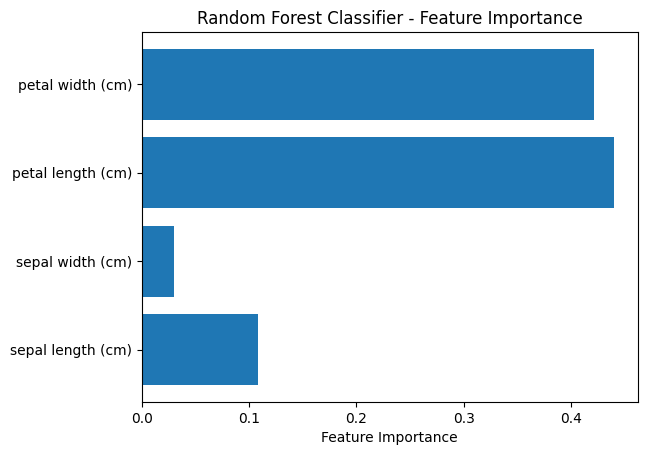

In [23]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import datasets

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print("RESULTS:")
print()
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualize feature importance
print("BAR CHART:")
feature_importance = rf_classifier.feature_importances_
feature_names = iris.feature_names

print()
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Random Forest Classifier - Feature Importance')
plt.show()


- The results of the Random Forest Classifier applied to the Iris dataset demonstrate exceptional performance, as indicated by an accuracy score of 1.0, implying a perfect classification of the test set. 
- The confusion matrix further supports this with all diagonal elements being non-zero, indicating correct predictions for each class (setosa, versicolor, and virginica). 
- The classification report provides additional details on the precision, recall, and F1-score for each class, all of which are at the maximum value of 1.0, emphasizing the model's ability to correctly identify instances from each class. 
- The macro and weighted averages also highlight the overall excellent performance across all classes. 
- The accompanying feature importance graph further contributes to the interpretability of the model, showing the contribution of each feature to the classification task. In summary, the Random Forest Algorithm demonstrates outstanding accuracy and robustness in classifying the Iris dataset, making it a reliable choice for similar classification tasks.


#### Example of Random Forest with synthetic data 

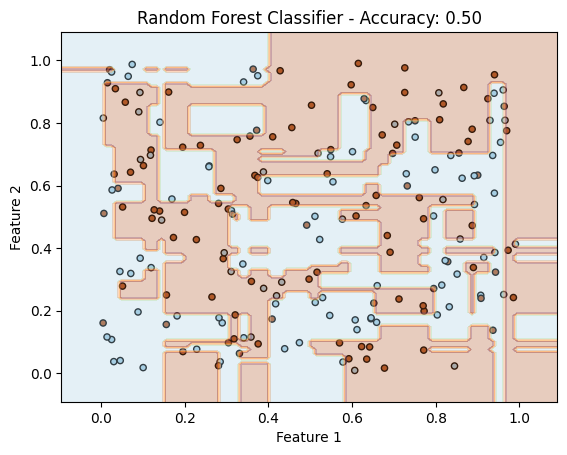

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic data
np.random.seed(42)
X, y = np.random.rand(200, 2), (np.random.rand(200) > 0.5).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier with 3 trees
rf_classifier = RandomForestClassifier(n_estimators=3, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = rf_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', s=20)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)

plt.title(f"Random Forest Classifier - Accuracy: {accuracy:.2f}")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


#### Example of Random Forest in ORANGE Software
[Link to YouTube Video](https://www.youtube.com/watch?v=gSQsFIMcA8A)

#### Summary
Classification trees are valuable for interpretability, but on employee attrition data, they become too large and intricate for practical understanding, revealing their instability with slight variations in samples. To address this, the concept of a random forest, or classification forest, is introduced. Instead of a single tree, a forest of trees is built through data sampling, providing diverse perspectives and voting on predicted classes, resulting in improved accuracy.

The text showcases the performance gain of random forests, highlighting an accuracy increase from 0.81 to 0.85 compared to individual trees. The impact of the number of trees in the forest is discussed, revealing a slight accuracy improvement with more trees. While excelling in accuracy, the challenge lies in interpretation, acknowledging the difficulty of understanding complex machine learning models despite their high predictive accuracy. Future videos are promised to explore additional classifiers and interpretation methods.
